In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import accuracy_score

sys.path.append('../../Share/')
sys.path.append('../V1 - Semi Supervised Learning in online(Pseudo-labeling)/')
import baseline, config, Model, utils
#import self_supervised_v1

import warnings
warnings.filterwarnings('ignore')

In [2]:
def filtering_zero(X,y):
    train_mask = y != 0
    X = X[train_mask]
    y = y[train_mask]
    return X, y

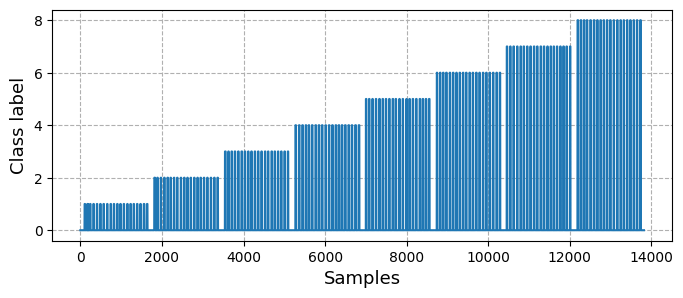

(11054, 4, 14, 1) (11054,) (2764, 4, 14, 1) (2764,)


In [3]:
path = 'C:/Users/hml76/Desktop/Fasikl/Mindforce/Exp_2025-07-30/E9AD0E7DCC2B/raw/'
feature_set, labels = utils.get_dataset(path, classes=['1/','2/','3/','4/','5/','6/','7/','8/'], show_labels=True)
X_train, y_train, X_test, y_test = utils.split_data(feature_set, labels, ratio=0.8)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 87.62%
Maximum validation accuracy : 87.59%


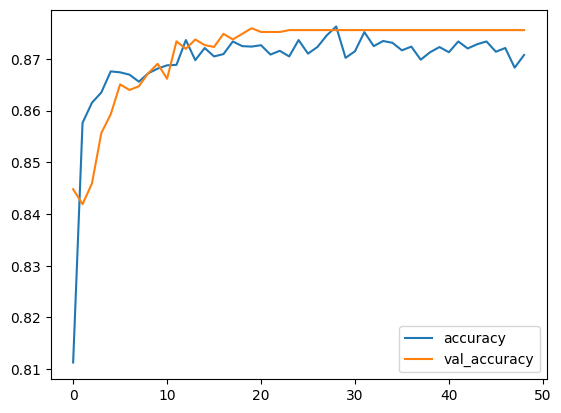

In [4]:
model = Model.Original_model(X_train.shape[1:], num_class=9)

history, model = Model.Train_model(
    model, X_train, y_train, X_test, y_test,
    set_epoch=100, set_batch_size=256, Model_name='V0',
    set_verbose=False, save_model_set=False
)

acc = float(np.max(history.history['val_accuracy']) * 100)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

(1775, 4, 14, 1) (1775,) (486, 4, 14, 1) (486,)
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 36.06%
Maximum validation accuracy : 43.42%


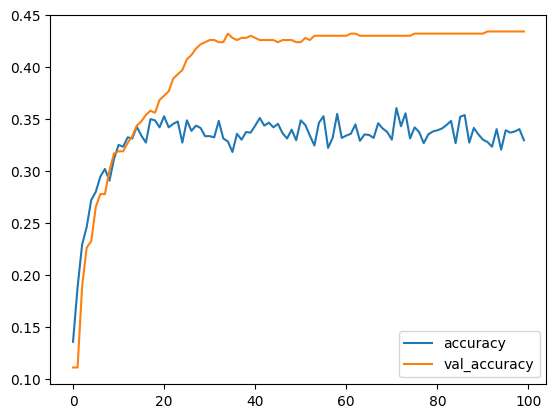

In [6]:
# 클래스 0이 아닌 것만 필터링
X_train, y_train = filtering_zero(X_train, y_train)
X_test, y_test = filtering_zero(X_test, y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

model = Model.Original_model(X_train.shape[1:], num_class=9)

history, model = Model.Train_model(
    model, X_train, y_train, X_test, y_test,
    set_epoch=100, set_batch_size=256, Model_name='V0',
    set_verbose=False, save_model_set=False
)

acc = float(np.max(history.history['val_accuracy']) * 100)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# 0 없어지니깐 성능 엄청 줄어듦 => window size부터 다시 조율해야 할듯